In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('General_Education_School.csv')

In [4]:
df.shape

(1671, 10)

In [5]:
print("الأعمدة المتاحة:", df.columns.tolist())

الأعمدة المتاحة: ['DBN', 'School Name', 'School Type', 'Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate', 'Total Safety and Respect Score', 'Total Communication Score', 'Total Engagement Score', 'Total Academic Expectations Score']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   DBN                                1671 non-null   object
 1   School Name                        1671 non-null   object
 2   School Type                        1670 non-null   object
 3   Parent Response Rate               1671 non-null   object
 4   Teacher Response Rate              1671 non-null   object
 5   Student Response Rate              996 non-null    object
 6   Total Safety and Respect Score     1671 non-null   object
 7   Total Communication Score          1671 non-null   object
 8   Total Engagement Score             1671 non-null   object
 9   Total Academic Expectations Score  1671 non-null   object
dtypes: object(10)
memory usage: 130.7+ KB


In [7]:
df.head(5)

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7


صف الرأس الثاني (dbn, rr_p, saf_tot_12...) يُدرج أحيانًا في الملفات المصّدرة من نظم داخلية لشرح معاني الأعمدة، لكن لا يُستخدم في التحليل الفعلي. الاحتفاظ به سيشوّه الإحصائيات، لذلك يُحذف بعد التأكد من أنه لا يحتوي على بيانات فعلية.

In [8]:
# الاحتفاظ بالصف الأول كمرجع
column_short_names = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)


In [9]:
df.shape

(1670, 10)

In [10]:
df.describe()

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
count,1670,1670,1670,1670,1670,995,1670,1670,1670,1670
unique,1667,1665,9,100,83,74,44,42,40,39
top,84M483,New York French American Charter School,Elementary School,100%,100%,99%,8.3,7.4,7.6,7.7
freq,2,2,617,45,334,61,98,101,102,115


In [11]:
# عرض القيم المكررة
duplicated_dbns = df['DBN'][df['DBN'].duplicated(keep=False)]
duplicated_dbns.value_counts()



,count
DBN,
84M481,2
84M482,2
84M483,2


In [12]:
df[df['DBN'].isin(duplicated_dbns)]


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
1603,84M481,Democracy Preparatory Harlem Charter School,Middle School,70%,100%,96%,8.1,7.7,7.6,8.5
1604,84M482,Harlem Success Academy Charter School 5,Early Childhood School,98%,100%,NaN,8.4,7.8,7.8,8.5
1605,84M483,New York French American Charter School,Early Childhood School,50%,62%,NaN,7.1,6.4,5.9,6.1
1667,84M481,Democracy Preparatory Harlem Charter School,Middle School,70%,100%,96%,8.1,7.7,7.6,8.5
1668,84M482,Harlem Success Academy Charter School 5,Early Childhood School,98%,100%,NaN,8.4,7.8,7.8,8.5
1669,84M483,New York French American Charter School,Early Childhood School,50%,62%,NaN,7.1,6.4,5.9,6.1


In [13]:

# Removing duplicate rows based on the 'DBN' column and counting removed duplicates
initial_rows = len(df)
df.drop_duplicates(subset=['DBN'], keep='first', inplace=True)
removed_duplicates = initial_rows - len(df)

print(f"Number of duplicate rows removed: {removed_duplicates}")


Number of duplicate rows removed: 3


In [14]:
df.describe()

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
count,1667,1667,1667,1667,1667,994,1667,1667,1667,1667
unique,1667,1665,9,100,83,74,44,42,40,39
top,84X730,P.S. 212,Elementary School,100%,100%,99%,8.3,7.4,7.5,7.7
freq,1,2,617,45,332,61,98,101,101,115


In [16]:

duplicate_school_names = df[df.duplicated(subset=['School Name'], keep=False)]['School Name'].unique()

print("Duplicate School Names:")
for school_name in duplicate_school_names:
    print(school_name)

# Analyze if DBN is also duplicated for these school names
for school_name in duplicate_school_names:
    duplicate_dbns_for_school = df[df['School Name'] == school_name]['DBN'].unique()
    if len(duplicate_dbns_for_school) > 1:
        print(f"\nSchool Name '{school_name}' has multiple DBNs:")
        for dbn in duplicate_dbns_for_school:
            print(f"- {dbn}")

    else:
        print(f"\nSchool Name '{school_name}' has only one DBN: {duplicate_dbns_for_school[0]}")



Duplicate School Names:
P.S. 212
P.S. 253

School Name 'P.S. 212' has multiple DBNs:
- 12X212
- 30Q212

School Name 'P.S. 253' has multiple DBNs:
- 21K253
- 27Q253


In [17]:

duplicate_rows = df[df['School Name'] == school_name]
duplicate_rows


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
1030,21K253,P.S. 253,Elementary School,100%,96%,NaN,9.3,8.8,8.9,9
1276,27Q253,P.S. 253,Elementary School,70%,93%,NaN,8.7,8.2,8.4,8.5


In [18]:
duplicate_rows = df[df['School Name'] == "P.S. 212"]
duplicate_rows

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
631,12X212,P.S. 212,Elementary/Middle School,33%,84%,99%,7.6,7,7.5,7.9
1417,30Q212,P.S. 212,Elementary School,86%,64%,NaN,8.5,7.4,7.8,8


فرع Bronx يخدم مراحل ابتدائية ومتوسطة (Elementary/Middle).

فرع Queens يخدم فقط المرحلة الابتدائية (Elementary).

الاستنتاج: هذان الفرعان يعملان في سياقين تعليميين مختلفين، ما قد يؤثر على معدلات الاستجابة، ومستوى التفاعل، والتوقعات الأكاديمية.

In [19]:
df['Borough'] = df['DBN'].str[2]  # الحرف الثالث من DBN
df['Borough'].unique()

array(['M', 'X', 'K', 'Q', 'R'], dtype=object)

 `12X212` represents a school (number 212) in District (المنطقة) 12, located in the Bronx borough.


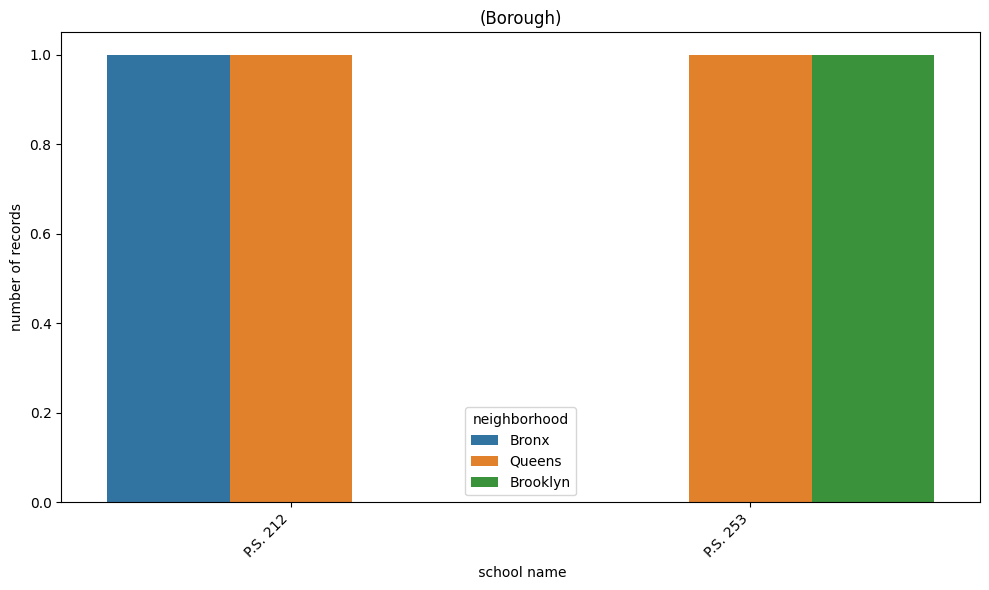

In [20]:

# استخراج الحي من DBN
df['Borough'] = df['DBN'].str[2]  # الحرف الثالث من DBN

# ترميز الحرف إلى اسم الحي
borough_map = {'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'X': 'Bronx', 'R': 'Staten Island'}
df['Borough'] = df['Borough'].map(borough_map)

# البحث عن الأسماء المكررة
duplicated_names = df[df.duplicated('School Name', keep=False)]

# تجميع عدد التكرارات حسب اسم المدرسة والحي
name_borough_counts = duplicated_names.groupby(['School Name', 'Borough']).size().reset_index(name='Count')

# الرسم
plt.figure(figsize=(10,6))
sns.barplot(data=name_borough_counts, x='School Name', y='Count', hue='Borough')
plt.xticks(rotation=45, ha='right')
plt.title('(Borough)')
plt.ylabel('number of records')
plt.xlabel(' school name')
plt.legend(title='neighborhood')
plt.tight_layout()
plt.show()


2. تحويل الأعمدة الرقمية من object إلى float:


In [21]:
#for col in ['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']:
 #   df[col] = df[col].str.replace('%', '').astype(float)

#score_columns = [
    #'Total Safety and Respect Score',
   # 'Total Communication Score',
  #  'Total Engagement Score',
 #   'Total Academic Expectations Score'
#]

#for col in score_columns:
#    df[col] = pd.to_numeric(df[col])
cols = [
    'Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate',
    'Total Safety and Respect Score', 'Total Communication Score',
    'Total Engagement Score', 'Total Academic Expectations Score'
]

# تحويل النسب إلى أرقام
for col in cols[:3]:
    df[col] = df[col].astype(str)  # Convert to string type
    df[col] = df[col].str.replace('%', '').astype(float)  # Replace '%' and convert to float
for col in cols[3:]:  # الدرجات الكمية
    df[col] = df[col].astype(float)


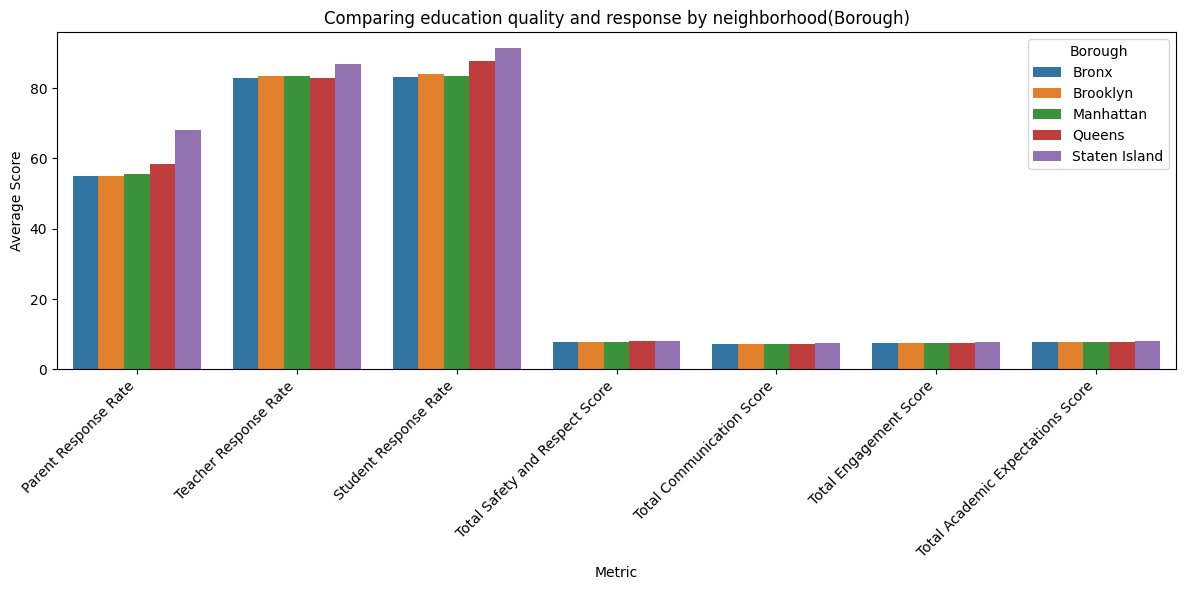

In [22]:

# حساب المتوسطات حسب الحي
borough_group = df.groupby('Borough')[cols].mean().round(2).reset_index()

# تحويل الجدول إلى شكل مناسب للرسم
melted = borough_group.melt(id_vars='Borough', var_name='Metric', value_name='Average Score')

# رسم الرسم البياني
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Metric', y='Average Score', hue='Borough')
plt.xticks(rotation=45, ha='right')
plt.title('Comparing education quality and response by neighborhood(Borough)')
plt.tight_layout()
plt.show()

🔹 Staten Island:
يسجّل أعلى معدلات في جميع المؤشرات تقريبًا، خصوصًا:

نسبة استجابة أولياء الأمور.

توقعات أكاديمية عالية.

سلامة واحترام وتفاعل مرتفع.

✨ قد يدل على بيئة تعليمية مستقرة وداعمة.

🔹 Queens و Brooklyn و Manhattan:
متقاربة جدًا في الأداء.

Manhattan سجل انخفاضًا طفيفًا في بعض مؤشرات الاستجابة.

🔹 Bronx:
يسجل أدنى معدلات في:

استجابة أولياء الأمور.

السلامة والتفاعل والتواصل.

⚠️ قد يشير ذلك إلى حاجة لدعم إضافي في جودة البيئة المدرسية والتواصل المجتمعي.



# عمود School Type

In [23]:
missing_type = df[df['School Type'].isna()]
print(missing_type)


Empty DataFrame
Columns: [DBN, School Name, School Type, Parent Response Rate, Teacher Response Rate, Student Response Rate, Total Safety and Respect Score, Total Communication Score, Total Engagement Score, Total Academic Expectations Score, Borough]
Index: []


In [24]:
df['School Type'].value_counts(dropna=False)


,count
School Type,
Elementary School,617
High School,352
Middle School,292
Elementary/Middle School,160
Middle/High School,87
Early Childhood School,81
Transfer High School,49
YABC,22
Elementary/Middle/High School,7


Parent Response Rate

Teacher Response Rate

Student Response Rate

In [25]:

# نسب الاستجابة - وصف إحصائي
print("\n📊 نسب الاستجابة (أولياء الأمور، المعلمين، الطلاب):")
df[['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']].describe()



📊 نسب الاستجابة (أولياء الأمور، المعلمين، الطلاب):


,Parent Response Rate,Teacher Response Rate,Student Response Rate
count,1667.000000,1667.000000,994.000000
mean,56.335933,83.403119,84.533199
std,25.008905,17.426696,16.133987
min,1.000000,0.000000,0.000000
25%,37.000000,75.000000,79.000000
50%,57.000000,88.000000,90.000000
75%,76.000000,97.000000,96.000000
max,100.000000,100.000000,100.000000


    Total Safety and Respect Score
    Total Communication Score
    Total Engagement Score
    Total Academic Expectations Score

In [26]:
# التقييمات النوعية
print("\n⭐ تقييمات الجودة (الأمان، التواصل، التفاعل، التوقعات الأكاديمية):")
df[cols[3:]].describe()



⭐ تقييمات الجودة (الأمان، التواصل، التفاعل، التوقعات الأكاديمية):


,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
count,1667.000000,1667.000000,1667.000000,1667.000000
mean,7.850330,7.299820,7.582244,7.879544
std,0.745997,0.697943,0.662616,0.624073
min,4.700000,4.700000,4.800000,5.300000
25%,7.300000,6.800000,7.100000,7.500000
50%,7.900000,7.300000,7.600000,7.900000
75%,8.400000,7.800000,8.000000,8.300000
max,9.600000,9.200000,9.300000,9.500000


In [27]:

# المدارس منخفضة التقييم أو الاستجابة = 0
low_performance = df[
    (df[cols[3:]] < 5).any(axis=1) |
    (df[['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']] == 0).any(axis=1)
]
print(f"\n🚨 عدد المدارس التي لديها تقييم أو استجابة منخفضة جدًا: {low_performance.shape[0]}")
low_performance[['School Name'] + cols[3:]]



🚨 عدد المدارس التي لديها تقييم أو استجابة منخفضة جدًا: 4


,School Name,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
394,School For Community Research And Learning,5.8,6.4,6.6,6.8
635,New Day Academy,7.3,6.8,7.0,7.4
829,The Brooklyn Academy Of Global Finance,4.7,4.7,4.8,5.3
1640,Icahn Charter School 2,9.2,8.7,8.3,9.1


In [28]:

# المدارس الأعلى أداءً
high_performance = df[df[cols[3:]].ge(9).any(axis=1)]
print(f"\n🏆 عدد المدارس ذات الأداء الممتاز (تقييم >= 9): {high_performance.shape[0]}")
high_performance[['School Name'] + cols[3:]]



🏆 عدد المدارس ذات الأداء الممتاز (تقييم >= 9): 113


,School Name,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
20,Earth School,9.0,8.5,8.9,8.7
42,P.S. 059 Beekman Hill International,9.1,8.1,8.8,8.9
51,P.S. 130 Hernando De Soto,9.1,8.0,8.5,8.5
54,Yorkville Community School,9.3,8.5,8.8,9.0
59,P.S. 212 Midtown West,9.0,8.5,8.9,8.8
...,...,...,...,...,...
1647,Bronx Academy Of Promise Charter School,9.1,8.7,8.7,8.7
1651,Girls Preparatory Charter School Of The Bronx,9.2,8.7,8.7,9.1
1654,Bronx Success Academy Charter School 1,8.7,8.5,8.3,9.0
1655,Bronx Success Academy Charter School 2,9.2,8.4,8.8,9.2


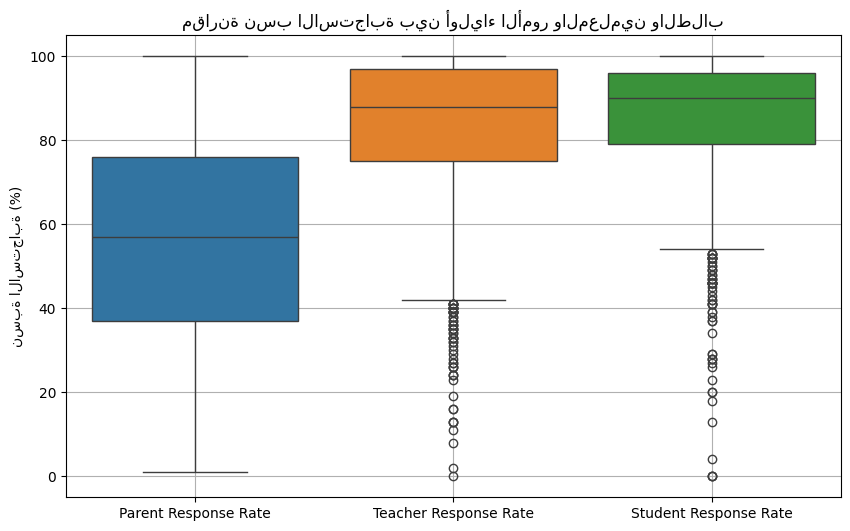

In [29]:

# رسم بياني لمقارنة نسب الاستجابة
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']])
plt.title("مقارنة نسب الاستجابة بين أولياء الأمور والمعلمين والطلاب")
plt.ylabel("نسبة الاستجابة (%)")
plt.grid(True)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1667 entries, 0 to 1666
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DBN                                1667 non-null   object 
 1   School Name                        1667 non-null   object 
 2   School Type                        1667 non-null   object 
 3   Parent Response Rate               1667 non-null   float64
 4   Teacher Response Rate              1667 non-null   float64
 5   Student Response Rate              994 non-null    float64
 6   Total Safety and Respect Score     1667 non-null   float64
 7   Total Communication Score          1667 non-null   float64
 8   Total Engagement Score             1667 non-null   float64
 9   Total Academic Expectations Score  1667 non-null   float64
 10  Borough                            1667 non-null   object 
dtypes: float64(7), object(4)
memory usage: 156.3+ KB


In [ ]:
df.head()

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,01M015,P.S. 015 Roberto Clemente,Elementary School,61.0,92.0,NaN,8.4,8.2,8.3,8.2
1,01M019,P.S. 019 Asher Levy,Elementary School,92.0,94.0,NaN,8.4,8.0,8.0,8.2
2,01M020,P.S. 020 Anna Silver,Elementary School,88.0,73.0,NaN,8.5,7.8,8.2,8.2
3,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39.0,58.0,96.0,7.3,6.9,7.3,7.7
4,01M063,P.S. 063 William Mckinley,Elementary School,58.0,100.0,NaN,8.5,7.4,7.6,7.8


#  تحليل استكشافي (EDA):


In [ ]:
df.describe()

,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
count,1670.000000,1670.000000,995.000000,1670.000000,1670.00000,1670.000000,1670.000000
mean,56.365269,83.410180,84.544724,7.850359,7.29982,7.581377,7.879222
std,25.009922,17.428378,16.129966,0.745699,0.69784,0.663321,0.625401
min,1.000000,0.000000,0.000000,4.700000,4.70000,4.800000,5.300000
25%,37.000000,75.000000,79.000000,7.300000,6.80000,7.100000,7.500000
50%,57.000000,88.000000,90.000000,7.900000,7.30000,7.600000,7.900000
75%,76.000000,97.000000,96.000000,8.400000,7.80000,8.000000,8.300000
max,100.000000,100.000000,100.000000,9.600000,9.20000,9.300000,9.500000


تبيّن من هذه الإحصاءات أن المعلمين والطلاب عمومًا أكثر تجاوبًا من أولياء الأمور.

المعايير النوعيّة (الأمان، التواصل، التفاعل، التوقعات الأكاديمية) مرتفعّة عمومًا في معظم المدارس (متوسطات حول 7.5–8).

مدارس محدودة تحتاج اهتمامًا خاصًا، خاصة تلك التي سجلت مستويات منخفضة جدًا (أقل من 5 في بعض المحاور أو استجابة 0% في بعض الفئات).

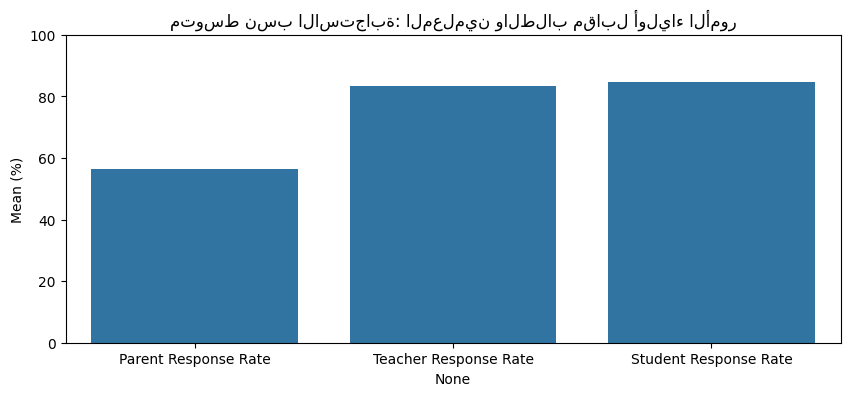

In [ ]:
# --- 2. رسم متوسط نسب الاستجابة ---
plt.figure(figsize=(10,4))
mean_responses = df[['Parent Response Rate','Teacher Response Rate','Student Response Rate']].mean()
sns.barplot(x=mean_responses.index, y=mean_responses.values)
plt.ylabel('Mean (%)')
plt.title('متوسط نسب الاستجابة: المعلمين والطلاب مقابل أولياء الأمور')
plt.ylim(0,100)
plt.show()


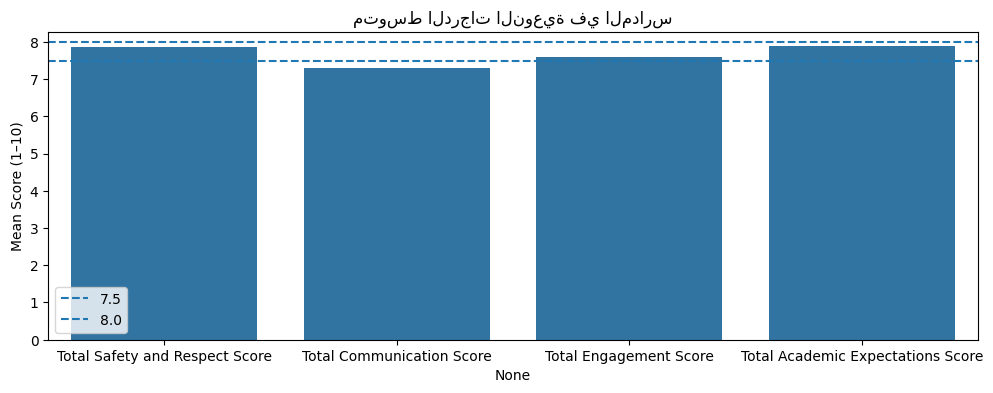

In [ ]:
# --- 3. رسم متوسط الدرجات النوعية ---
plt.figure(figsize=(12,4))
mean_scores = df[score_columns].mean()
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.ylabel('Mean Score (1–10)')
plt.title('متوسط الدرجات النوعية في المدارس')
plt.axhline(7.5, linestyle='--', label='7.5')
plt.axhline(8.0, linestyle='--', label='8.0')
plt.legend()
plt.show()


In [ ]:

# --- 4. تحديد المدارس التي تحتاج اهتمامًا خاصًا ---
# شرط: أي نسبة استجابة = 0% أو أي درجة نوعية < 5
mask_low = (
    (df[['Parent Response Rate','Teacher Response Rate','Student Response Rate']] == 0).any(axis=1)
    | (df[score_columns] < 5).any(axis=1)
)
alert_schools = df.loc[mask_low,
    ['DBN', 'School Name',
     'Parent Response Rate','Teacher Response Rate','Student Response Rate'] + score_columns
]

print("المدارس التي سجلت استجابة صفرية أو درجات أقل من 5 في بعض المحاور:\n")
print(alert_schools.to_string(index=False))

المدارس التي سجلت استجابة صفرية أو درجات أقل من 5 في بعض المحاور:

   DBN                                School Name  Parent Response Rate  Teacher Response Rate  Student Response Rate  Total Safety and Respect Score  Total Communication Score  Total Engagement Score  Total Academic Expectations Score
08X540 School For Community Research And Learning                   2.0                   50.0                    0.0                             5.8                        6.4                     6.6                                6.8
12X245                            New Day Academy                  11.0                    0.0                    0.0                             7.3                        6.8                     7.0                                7.4
16K688     The Brooklyn Academy Of Global Finance                  15.0                  100.0                   62.0                             4.7                        4.7                     4.8                         

## Student Response Rate

In [31]:
# نسبة القيم المفقودة
missing_ratio = df['Student Response Rate'].isna().mean()
print(f"🔍 نسبة القيم المفقودة في 'Student Response Rate': {missing_ratio:.2%}")


🔍 نسبة القيم المفقودة في 'Student Response Rate': 40.37%


In [32]:
# توزيع القيم المفقودة حسب نوع المدرسة
missing_by_type = df[df['Student Response Rate'].isna()]['School Type'].value_counts()
print("❓ القيم المفقودة حسب نوع المدرسة:\n", missing_by_type)

# توزيع حسب الحي
missing_by_borough = df[df['Student Response Rate'].isna()]['Borough'].value_counts()
print("❓ القيم المفقودة حسب الحي:\n", missing_by_borough)


❓ القيم المفقودة حسب نوع المدرسة:
 School Type
Elementary School         589
Early Childhood School     81
Middle School               3
Name: count, dtype: int64
❓ القيم المفقودة حسب الحي:
 Borough
Brooklyn         221
Bronx            151
Queens           150
Manhattan        108
Staten Island     43
Name: count, dtype: int64


In [39]:

# حفظ نسخة من العمود الأصلي قبل التعبئة
df["Student Response Rate (Original)"] = df["Student Response Rate"]

# حساب المتوسط لكل مجموعة من نوع المدرسة والحي
grouped_means = df.groupby(["School Type", "Borough"])["Student Response Rate"].mean()


grouped_means

School Type                    Borough      
Early Childhood School         Bronx                  NaN
                               Brooklyn               NaN
                               Manhattan              NaN
                               Queens                 NaN
                               Staten Island          NaN
Elementary School              Bronx            79.000000
                               Brooklyn         99.600000
                               Manhattan        99.000000
                               Queens           97.437500
                               Staten Island          NaN
Elementary/Middle School       Bronx            95.481481
                               Brooklyn         92.909091
                               Manhattan        91.536585
                               Queens           96.416667
                               Staten Island    90.000000
Elementary/Middle/High School  Bronx            94.500000
                               Brooklyn         83.000000
                               Manhattan        87.000000
                               Queens           99.000000
                               Staten Island    96.000000
High School                    Bronx            77.343434
                               Brooklyn         76.580000
                               Manhattan        77.872093
                               Queens           77.258621
                               Staten Island    87.222222
Middle School                  Bronx            89.822785
                               Brooklyn         90.389474
                               Manhattan        92.636364
                               Queens           92.425532
                               Staten Island    95.538462
Middle/High School             Bronx            81.750000
                               Brooklyn         83.222222
                               Manhattan        82.950000
                               Queens           89.812500
Transfer High School           Bronx            70.777778
                               Brooklyn         67.625000
                               Manhattan        67.000000
                               Queens           70.000000
                               Staten Island    65.000000
YABC                           Bronx            68.875000
                               Brooklyn         64.875000
                               Manhattan        43.500000
                               Queens           65.666667
                               Staten Island    95.000000
Name: Student Response Rate, dtype: float64

In [47]:
df[(df['Borough'] == 'Staten Island') & (df['School Type'] == 'Elementary School')]


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score,Borough,Student Response Rate (Original),Student RR Missing
1434,31R001,P.S. 001 Tottenville,Elementary School,67.0,100.0,NaN,8.6,8.1,8.1,8.6,Staten Island,NaN,1
1436,31R003,P.S. 003 The Margaret Gioiosa School,Elementary School,81.0,98.0,NaN,8.8,7.8,8.3,8.3,Staten Island,NaN,1
1437,31R004,P.S. 004 Maurice Wollin,Elementary School,84.0,84.0,NaN,8.1,7.2,7.4,7.6,Staten Island,NaN,1
1438,31R005,P.S. 005 Huguenot,Elementary School,77.0,100.0,NaN,9.5,8.9,9.1,9.3,Staten Island,NaN,1
1439,31R006,P.S. 6 Corporal Allan F. Kivlehan School,Elementary School,62.0,92.0,NaN,8.6,7.6,8.1,8.2,Staten Island,NaN,1
1441,31R008,P.S. 8 Shirlee Solomon,Elementary School,100.0,100.0,NaN,9.3,9.0,9.1,9.2,Staten Island,NaN,1
1442,31R011,P.S. 11 Thomas Dongan School,Elementary School,63.0,86.0,NaN,8.2,7.0,7.6,7.7,Staten Island,NaN,1
1443,31R014,P.S. 014 Cornelius Vanderbilt,Elementary School,52.0,41.0,NaN,7.4,7.3,7.5,7.5,Staten Island,NaN,1
1444,31R016,P.S. 016 John J. Driscoll,Elementary School,56.0,58.0,NaN,7.6,7.0,7.4,7.5,Staten Island,NaN,1
1445,31R018,P.S. 018 John G. Whittier,Elementary School,78.0,67.0,NaN,7.7,7.2,7.4,7.3,Staten Island,NaN,1


In [48]:
citywide_elem_mean = df[
    (df['School Type'] == 'Elementary School') &
    (df['Student Response Rate'].notna())
]['Student Response Rate'].mean()

# 3. دالة تعبئة القيم المفقودة حسب القواعد المطلوبة
def impute_student_rr(row):
    school_type = row['School Type']
    borough = row['Borough']
    value = row['Student Response Rate']

    # إذا كانت القيمة موجودة، نتركها كما هي
    if pd.notna(value):
        return value

    # الحالة 1: Early Childhood School → نحتفظ بالقيمة NaN
    if school_type == 'Early Childhood School':
        return np.nan

    # الحالة 2: Elementary School في Staten Island → نعوّض بالمتوسط العام لهذا النوع
    if school_type == 'Elementary School' and borough == 'Staten Island':
        return citywide_elem_mean

    # الحالة 3: باقي القيم → نعوّض بالمتوسط بحسب النوع والحي
    try:
        return grouped_means.loc[(school_type, borough)]
    except KeyError:
        return np.nan  # لو ما وجدنا متوسط (نادرة)

# 4. تطبيق الدالة على العمود
df['Student Response Rate'] = df.apply(impute_student_rr, axis=1)


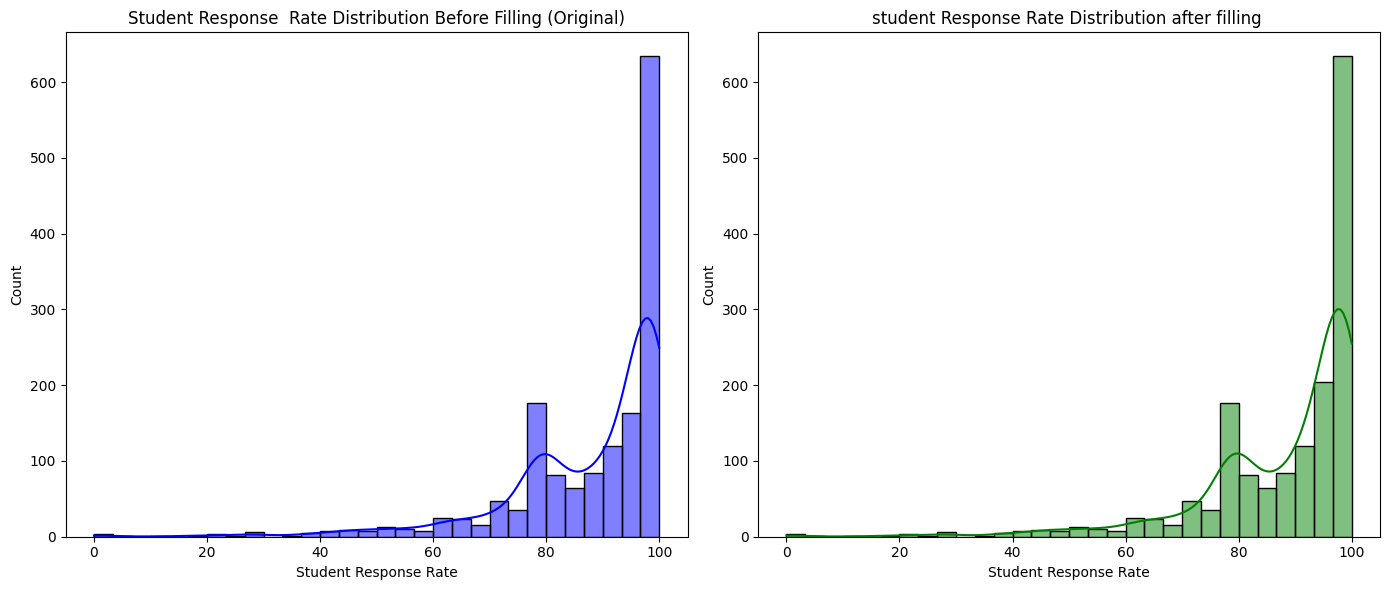

In [49]:

# رسم التوزيع قبل وبعد التعبئة
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["Student Response Rate (Original)"], kde=True, color='blue', bins=30)
plt.title("Student Response  Rate Distribution Before Filling (Original)" )
plt.xlabel("Student Response Rate")

plt.subplot(1, 2, 2)
sns.histplot(df["Student Response Rate"], kde=True, color='green', bins=30)
plt.title("student Response Rate Distribution after filling ")
plt.xlabel("Student Response Rate")

plt.tight_layout()
plt.show()

In [46]:
df[(df['Borough'] == 'Staten Island') & (df['School Type'] == 'Elementary School')]


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score,Borough,Student Response Rate (Original),Student RR Missing
1434,31R001,P.S. 001 Tottenville,Elementary School,67.0,100.0,NaN,8.6,8.1,8.1,8.6,Staten Island,NaN,1
1436,31R003,P.S. 003 The Margaret Gioiosa School,Elementary School,81.0,98.0,NaN,8.8,7.8,8.3,8.3,Staten Island,NaN,1
1437,31R004,P.S. 004 Maurice Wollin,Elementary School,84.0,84.0,NaN,8.1,7.2,7.4,7.6,Staten Island,NaN,1
1438,31R005,P.S. 005 Huguenot,Elementary School,77.0,100.0,NaN,9.5,8.9,9.1,9.3,Staten Island,NaN,1
1439,31R006,P.S. 6 Corporal Allan F. Kivlehan School,Elementary School,62.0,92.0,NaN,8.6,7.6,8.1,8.2,Staten Island,NaN,1
1441,31R008,P.S. 8 Shirlee Solomon,Elementary School,100.0,100.0,NaN,9.3,9.0,9.1,9.2,Staten Island,NaN,1
1442,31R011,P.S. 11 Thomas Dongan School,Elementary School,63.0,86.0,NaN,8.2,7.0,7.6,7.7,Staten Island,NaN,1
1443,31R014,P.S. 014 Cornelius Vanderbilt,Elementary School,52.0,41.0,NaN,7.4,7.3,7.5,7.5,Staten Island,NaN,1
1444,31R016,P.S. 016 John J. Driscoll,Elementary School,56.0,58.0,NaN,7.6,7.0,7.4,7.5,Staten Island,NaN,1
1445,31R018,P.S. 018 John G. Whittier,Elementary School,78.0,67.0,NaN,7.7,7.2,7.4,7.3,Staten Island,NaN,1


In [57]:
df.tail(20)

,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score,Borough,Student Response Rate (Original),Student RR Missing
1647,84X419,Bronx Academy Of Promise Charter School,Elementary School,76.0,97.0,79.0,9.1,8.7,8.7,8.7,Bronx,79.0,0
1648,84X422,Icahn Charter School 3,Elementary School,57.0,91.0,79.0,7.9,8.1,7.9,8.5,Bronx,79.0,0
1649,84X461,Metropolitan Lighthouse Charter School,Early Childhood School,56.0,100.0,NaN,7.6,7.6,7.6,7.8,Bronx,NaN,1
1650,84X482,Dr. Richard Izquierdo Health And Science Chart...,Middle School,76.0,56.0,95.0,7.3,6.7,7.1,7.4,Bronx,95.0,0
1651,84X487,Girls Preparatory Charter School Of The Bronx,Early Childhood School,81.0,100.0,NaN,9.2,8.7,8.7,9.1,Bronx,NaN,1
1652,84X488,The Equality Charter School,Middle School,81.0,89.0,100.0,8.3,8.1,8.2,8.7,Bronx,100.0,0
1653,84X491,Academic Leadership Charter School,Early Childhood School,92.0,100.0,NaN,8.8,8.5,8.5,8.9,Bronx,NaN,1
1654,84X493,Bronx Success Academy Charter School 1,Early Childhood School,96.0,100.0,NaN,8.7,8.5,8.3,9.0,Bronx,NaN,1
1655,84X494,Bronx Success Academy Charter School 2,Early Childhood School,97.0,95.0,NaN,9.2,8.4,8.8,9.2,Bronx,NaN,1
1656,84X496,Icahn Charter School 4,Elementary School,85.0,93.0,79.0,9.1,8.8,8.6,9.2,Bronx,79.0,0


In [51]:
df.describe()

,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score,Student Response Rate (Original),Student RR Missing
count,1667.000000,1667.000000,1586.000000,1667.000000,1667.000000,1667.000000,1667.000000,1545.000000,1667.000000
mean,56.335933,83.403119,88.068904,7.850330,7.299820,7.582244,7.879544,87.910079,0.073185
std,25.008905,17.426696,14.460563,0.745997,0.697943,0.662616,0.624073,14.617941,0.260519
min,1.000000,0.000000,0.000000,4.700000,4.700000,4.800000,5.300000,0.000000,0.000000
25%,37.000000,75.000000,79.000000,7.300000,6.800000,7.100000,7.500000,79.000000,0.000000
50%,57.000000,88.000000,94.000000,7.900000,7.300000,7.600000,7.900000,94.000000,0.000000
75%,76.000000,97.000000,98.000000,8.400000,7.800000,8.000000,8.300000,99.000000,0.000000
max,100.000000,100.000000,100.000000,9.600000,9.200000,9.300000,9.500000,100.000000,1.000000


# **EDA advanced**

العلاقة بين استجابة الأهل ودرجة الأمان

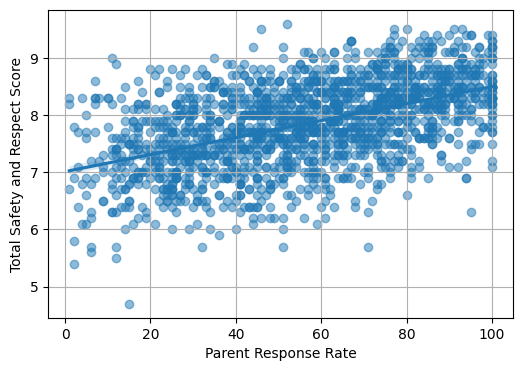

In [63]:

plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='Parent Response Rate', y='Total Safety and Respect Score', scatter_kws={'alpha':0.5})
plt.xlabel("Parent Response Rate")
plt.ylabel("Total Safety and Respect Score")
plt.grid(True)
plt.show()


العلاقة بين استجابة الأهل ودرجة التواصل

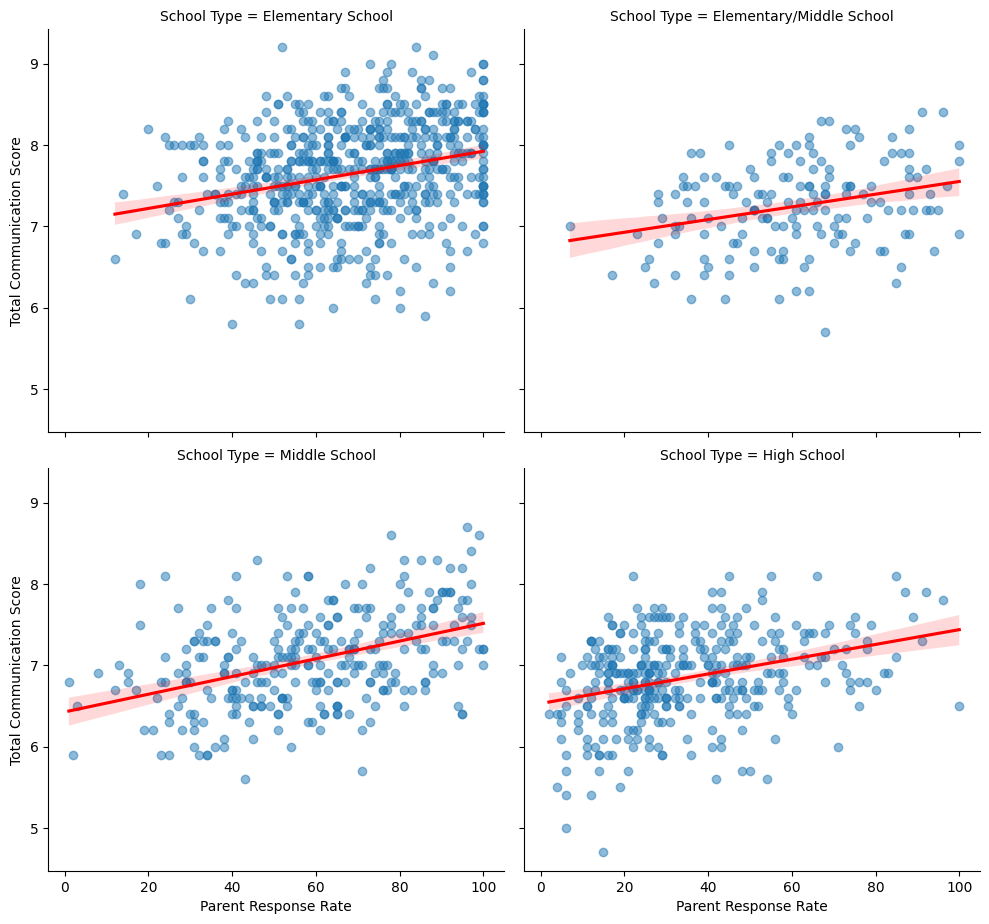

In [64]:

# تحديد الأنواع الأكثر تكرارًا لتجنب ازدحام الرسم
top_school_types = df['School Type'].value_counts().index[:4]  # مثلاً نأخذ أكثر 4 أنواع ظهورًا
filtered_df = df[df['School Type'].isin(top_school_types)]

# رسم العلاقة حسب نوع المدرسة
sns.lmplot(
    data=filtered_df,
    x='Parent Response Rate',
    y='Total Communication Score',
    col='School Type',
    col_wrap=2,
    height=5,
    scatter_kws={'alpha': 0.5},
    line_kws={"color": "red"}
)
plt.subplots_adjust(top=0.9)
plt.show()


العلاقة موجودة في كل الأنواع، لكنها أقوى في المدارس الابتدائية والمتوسطة، حيث يكون التواصل مع الأهل جزءًا رئيسيًا من إدارة المدرسة.



أداء وتفاعل حسب الحي (Borough)

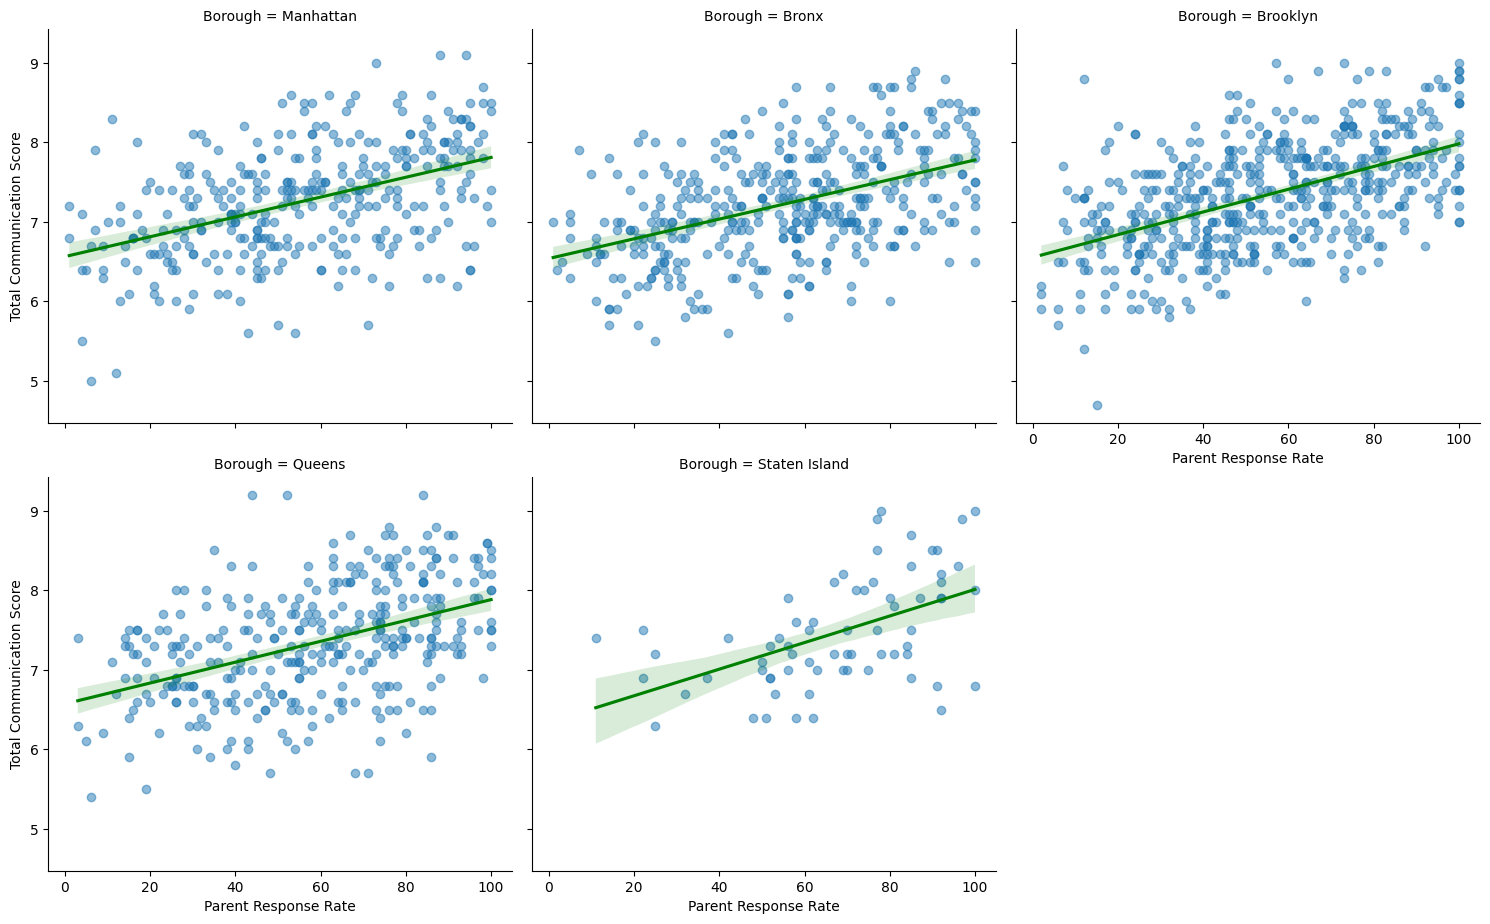

In [65]:
top_boroughs = df['Borough'].value_counts().index[:5]  # جميع الأحياء الخمسة
filtered_borough_df = df[df['Borough'].isin(top_boroughs)]

sns.lmplot(
    data=filtered_borough_df,
    x='Parent Response Rate',
    y='Total Communication Score',
    col='Borough',
    col_wrap=3,
    height=5,
    scatter_kws={'alpha': 0.5},
    line_kws={"color": "green"}
)
plt.subplots_adjust(top=0.9)
plt.show()


| الحي              | ملاحظة                                                                                          |
| ----------------- | ----------------------------------------------------------------------------------------------- |
| **Brooklyn**      | العلاقة الطردية بارزة، ما يعكس جهود تواصل فعالة عند وجود تفاعل من الأهالي.                      |
| **Bronx**         | العلاقة موجودة، لكنها أحيانًا أكثر تشتتًا، مما يشير إلى تنوع كبير في المدارس وظروفها داخل الحي. |
| **Manhattan**     | العلاقة واضحة وأنيقة، مما يعكس غالبًا استقرار البنية الإدارية والتعليمية في معظم المدارس.       |
| **Queens**        | علاقة قوية ومستقرة، ربما نتيجة التنوع السكاني والاهتمام المحلي بالتعليم.                        |
| **Staten Island** | الخط طردي ولكن غالبًا ما يكون عدد المدارس أقل، مما يجعلنا حذرين في تعميم الاستنتاج.             |


 أداء حسب نوع المدرسة

In [ ]:
df.groupby('School Type')[scores].mean().sort_values(by='Total Academic Expectations Score', ascending=False).plot(kind='bar', figsize=(14, 6))
plt.title("متوسط الأداء حسب نوع المدرسة")


اكتشاف المدارس الاستثنائية

In [70]:
# حدد الأعمدة التي سنحللها
performance_columns = [
    'Parent Response Rate',
    'Teacher Response Rate',
    'Student Response Rate',
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

# نستخدم طريقة IQR لاكتشاف القيم الشاذة (outliers)
outliers = {}

for col in performance_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.2 * IQR
    upper_bound = Q3 + 1.2 * IQR

    high_outliers = df[df[col] > upper_bound][['DBN', 'School Name', col]]
    low_outliers = df[df[col] < lower_bound][['DBN', 'School Name', col]]

    outliers[col] = {
        'high': high_outliers,
        'low': low_outliers
    }


In [71]:
# مثال: عرض المدارس ذات أداء عالي جدًا أو منخفض جدًا في تقييم التواصل
print("📌 مدارس تقييم التواصل (Communication) المرتفع جدًا:")
display(outliers['Total Communication Score']['high'])



📌 مدارس تقييم التواصل (Communication) المرتفع جدًا:


,DBN,School Name,Total Communication Score
248,05M517,Teachers College Community School,9.1
1336,28Q354,Ps 354,9.2
1398,30Q078,P.S. 078,9.2
1590,84M337,New York Center For Autism Charter School,9.1
1624,84Q341,Riverton Street Charter School,9.2


In [72]:
print("\n📌 مدارس تقييم التواصل (Communication) المنخفض جدًا:")
display(outliers['Total Communication Score']['low'])



📌 مدارس تقييم التواصل (Communication) المنخفض جدًا:


,DBN,School Name,Total Communication Score
118,02M520,Murry Bergtraum High School For Business Careers,5.5
164,03M283,Manhattan Theatre Lab High School,5.0
242,05M367,Academy For Social Action: A College Board School,5.1
445,09X324,Bronx Early College Academy For Teaching & Lea...,5.5
829,16K688,The Brooklyn Academy Of Global Finance,4.7
901,18K567,Brooklyn Theatre Arts High School,5.4
1294,27Q410,Beach Channel High School,5.4
1342,28Q686,Queens Metropolitan High School,5.5


<Axes: xlabel='Parent Response Rate', ylabel='Total Academic Expectations Score'>

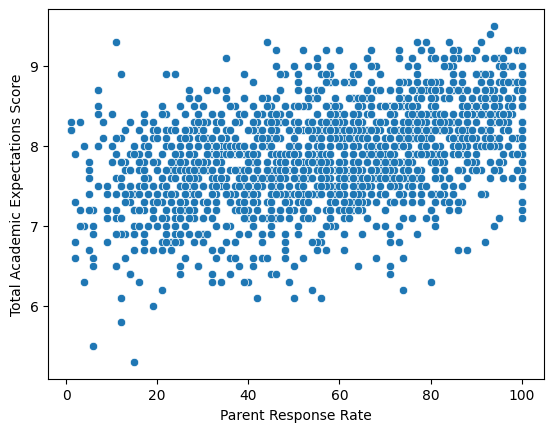

In [75]:
# رسم انتشار بين استجابة الأهل والأداء الأكاديمي
sns.scatterplot(data=df, x='Parent Response Rate', y='Total Academic Expectations Score')


 استجابة مرتفعة (>90%) وتقييم منخفض (<7.5)

In [79]:
outliers_high_response_low_expect = df[
    (df['Parent Response Rate'] >= 90) &
    (df['Total Academic Expectations Score'] < 7.5)
]
outliers_high_response_low_expect[['DBN', 'School Name', 'Parent Response Rate', 'Total Academic Expectations Score']]

,DBN,School Name,Parent Response Rate,Total Academic Expectations Score
49,02M124,P.S. 124 Yung Wing,100.0,7.3
58,02M198,P.S. 198 Isador E. Ida Straus,92.0,6.8
282,06M326,M.S. 326 - Writers Today & Leaders Tomorrow,95.0,7.1
398,09X004,P.S./M.S. 004 Crotona Park West,100.0,7.3
428,09X229,I.S. 229 Roland Patterson,94.0,7.0
624,12X134,P.S. 134 George F. Bristow,92.0,7.4
662,12X550,High School Of World Cultures,100.0,7.1
934,19K260,P.S. 260 Breuckelen,100.0,7.2
1017,21K153,P.S. 153 Homecrest,92.0,7.4
1476,31R055,P.S. 055 Henry M. Boehm,92.0,7.4


 استجابة منخفضة (<30%) وتقييم مرتفع (>8.5)

In [80]:
outliers_low_response_high_expect = df[
    (df['Parent Response Rate'] < 30) &
    (df['Total Academic Expectations Score'] >= 8.5)
]
outliers_low_response_high_expect[['DBN', 'School Name', 'Parent Response Rate', 'Total Academic Expectations Score']]

,DBN,School Name,Parent Response Rate,Total Academic Expectations Score
128,02M565,Urban Academy Laboratory High School,11.0,9.3
362,08X152,P.S. 152 Evergreen,25.0,8.5
395,08X560,Bronx Academy High School,7.0,8.7
502,10X244,The New School For Leadership And Journalism,27.0,8.7
652,12X428,Learning To Work Yabc At Monroe Academy,21.0,8.5
655,12X478,The Cinema School,22.0,8.9
711,13K657,Downtown Brooklyn Yabc,7.0,8.5
736,14K318,I.S. 318 Eugenio Maria De Hostos,24.0,8.9
742,14K449,"Brooklyn Latin School, The",29.0,8.6
948,19K431,Thomas Jefferson Yabc,12.0,8.9


 رسم شريطي يوضح توزيع هذه المدارس حسب نوع المدرسة

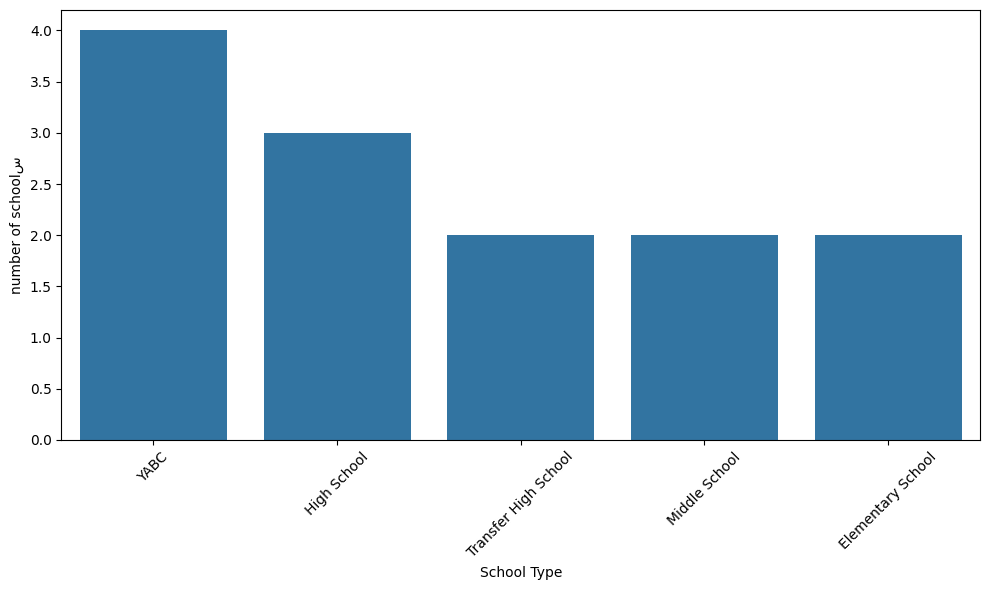

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=outliers_low_response_high_expect, x='School Type', order=outliers_low_response_high_expect['School Type'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('School Type')
plt.ylabel('number of schoolس')
plt.tight_layout()
plt.show()


. تحليل حسب الحي (Borough)



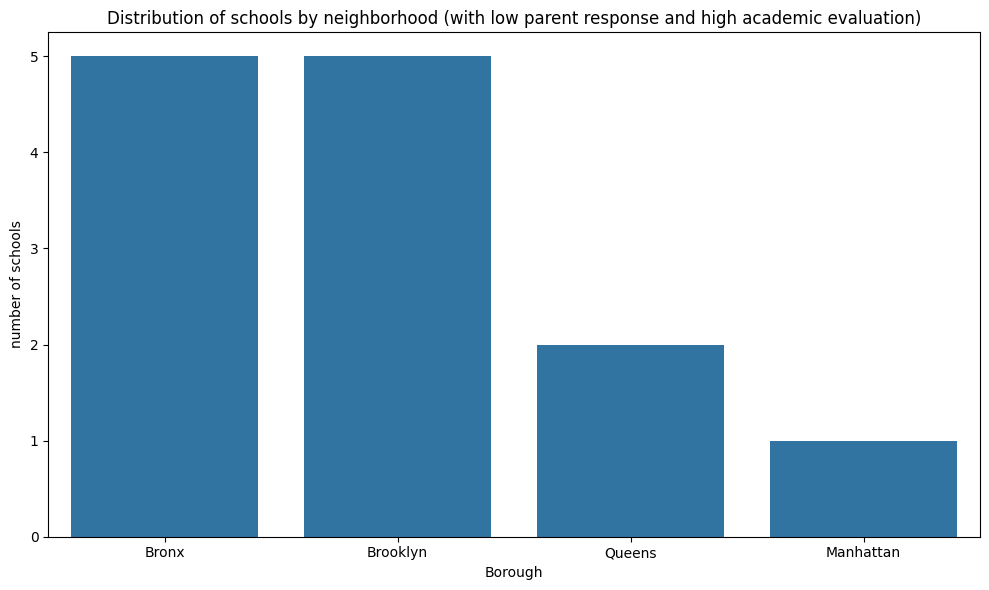

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=outliers_low_response_high_expect, x='Borough', order=outliers_low_response_high_expect['Borough'].value_counts().index)
plt.title('Distribution of schools by neighborhood (with low parent response and high academic evaluation)')
plt.xlabel('Borough')
plt.ylabel('number of schools')
plt.tight_layout()
plt.show()


 تحليل مؤشرات التواصل، التفاعل، واستجابة المعلمين


مقارنة توزيعات المؤشرات بين هذه المدارس وباقي المدارس


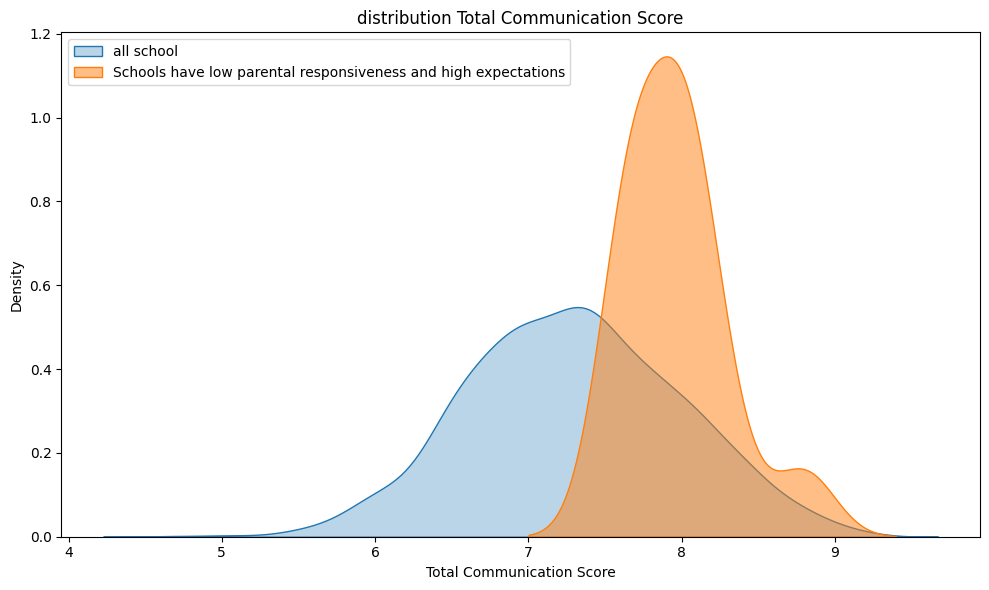

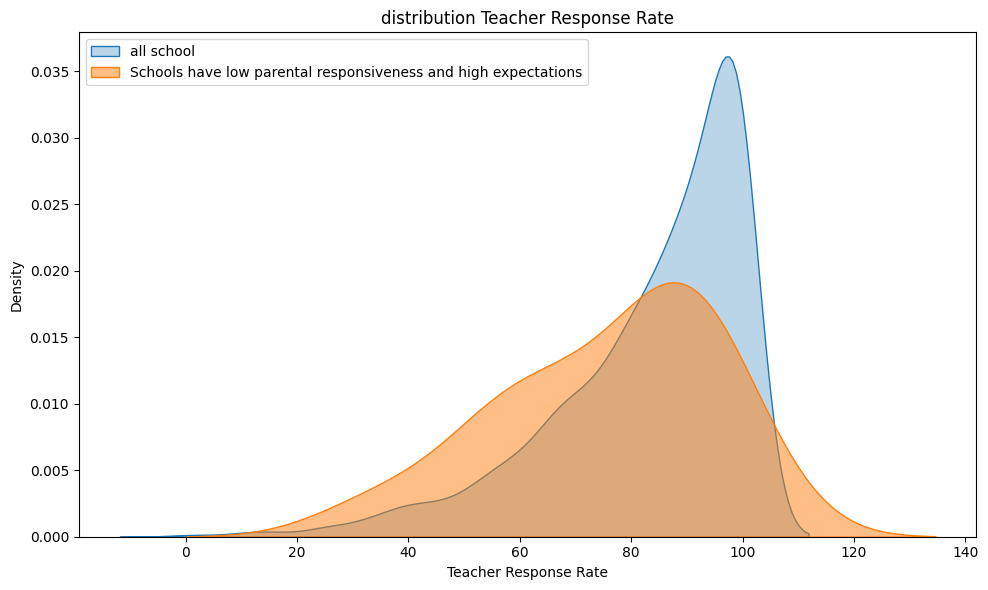

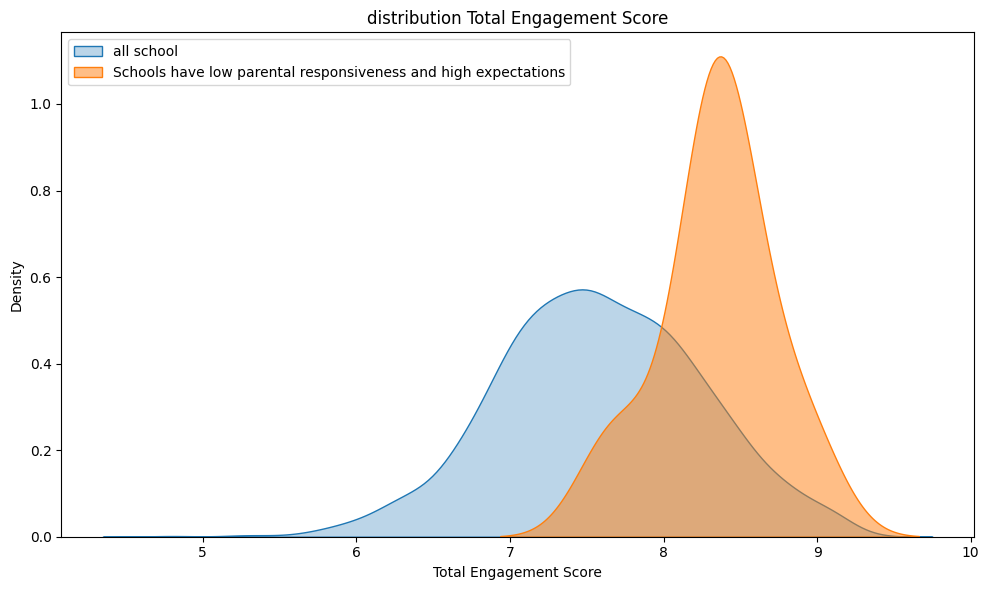

In [86]:
features = [
    'Total Communication Score',
    'Teacher Response Rate',
    'Total Engagement Score'
]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, label='all school ', fill=True, alpha=0.3)
    sns.kdeplot(data=outliers_low_response_high_expect, x=feature, label='Schools have low parental responsiveness and high expectations', fill=True, alpha=0.5)
    plt.title(f'distribution {feature}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [88]:
outliers_low_response_high_expect[['School Name', 'School Type', 'Borough',
                                         'Parent Response Rate', 'Teacher Response Rate',
                                         'Total Communication Score', 'Total Engagement Score',
                                         'Total Academic Expectations Score']]


,School Name,School Type,Borough,Parent Response Rate,Teacher Response Rate,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
128,Urban Academy Laboratory High School,Transfer High School,Manhattan,11.0,88.0,8.3,8.8,9.3
362,P.S. 152 Evergreen,Elementary School,Bronx,25.0,71.0,8.0,8.2,8.5
395,Bronx Academy High School,Transfer High School,Bronx,7.0,100.0,7.9,8.4,8.7
502,The New School For Leadership And Journalism,Middle School,Bronx,27.0,35.0,7.7,8.3,8.7
652,Learning To Work Yabc At Monroe Academy,YABC,Bronx,21.0,90.0,8.0,8.4,8.5
655,The Cinema School,High School,Bronx,22.0,93.0,8.1,8.5,8.9
711,Downtown Brooklyn Yabc,YABC,Brooklyn,7.0,89.0,7.7,8.3,8.5
736,I.S. 318 Eugenio Maria De Hostos,Middle School,Brooklyn,24.0,73.0,8.1,8.6,8.9
742,"Brooklyn Latin School, The",High School,Brooklyn,29.0,83.0,7.6,7.8,8.6
948,Thomas Jefferson Yabc,YABC,Brooklyn,12.0,92.0,8.8,9.0,8.9


# **Duplicate**

In [92]:
# نحدد فقط الأعمدة الرقمية القابلة للتحليل
numeric_cols = df.select_dtypes(include='float64')

# نحسب مصفوفة الارتباط بين الأعمدة
correlation_matrix = numeric_cols.corr()

# نعرض فقط العلاقات القوية (أكبر من 0.95 أو أقل من -0.95)
import numpy as np

high_correlation = (correlation_matrix.abs() > 0.85) & (correlation_matrix.abs() < 1.0)
redundant_pairs = high_correlation.stack()[high_correlation.stack()].index.tolist()

# عرض النتائج
for a, b in redundant_pairs:
    print(f" {a} ↔ {b} | corr = {correlation_matrix.loc[a, b]:.2f}")


 Total Safety and Respect Score ↔ Total Engagement Score | corr = 0.88
 Total Communication Score ↔ Total Engagement Score | corr = 0.95
 Total Communication Score ↔ Total Academic Expectations Score | corr = 0.93
 Total Engagement Score ↔ Total Safety and Respect Score | corr = 0.88
 Total Engagement Score ↔ Total Communication Score | corr = 0.95
 Total Engagement Score ↔ Total Academic Expectations Score | corr = 0.95
 Total Academic Expectations Score ↔ Total Communication Score | corr = 0.93
 Total Academic Expectations Score ↔ Total Engagement Score | corr = 0.95


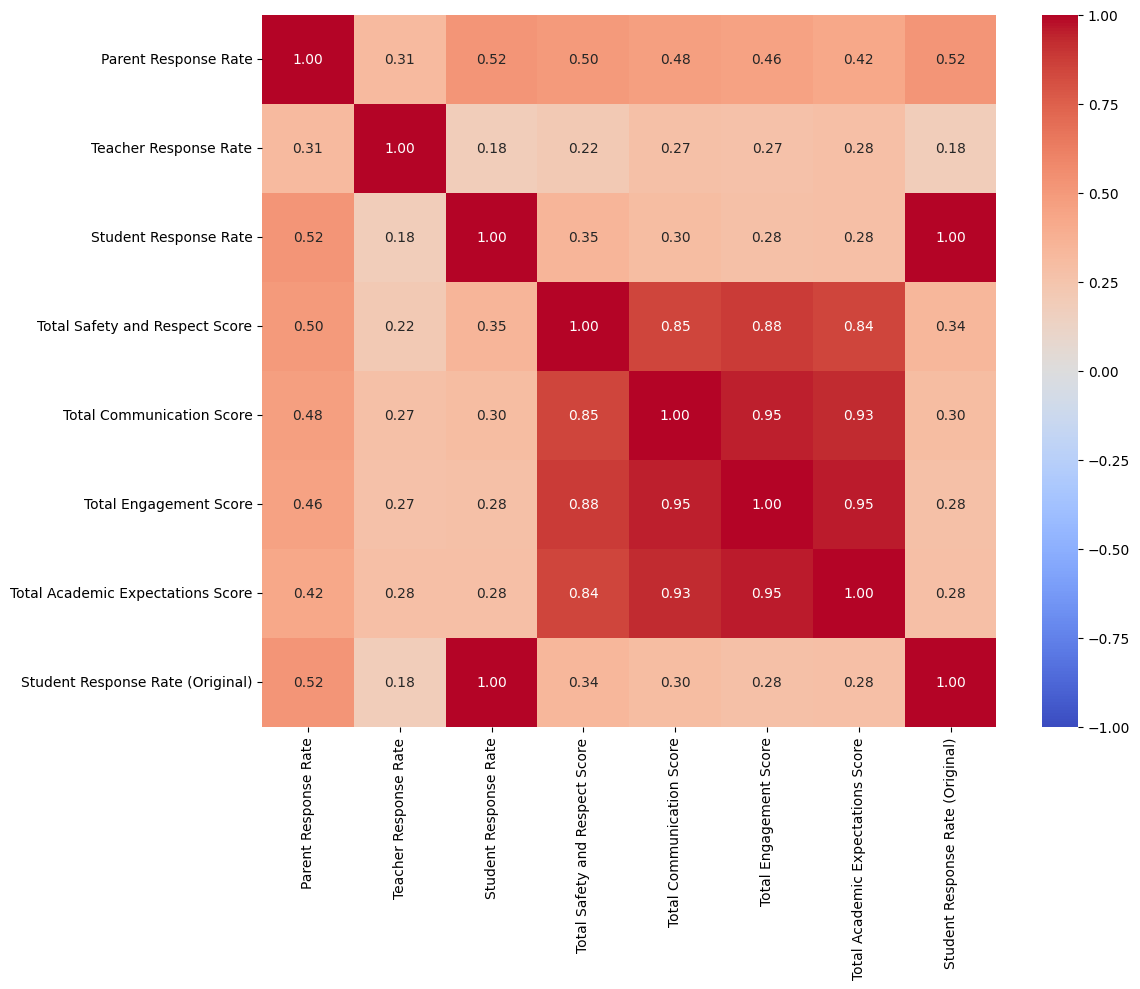

In [94]:

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.tight_layout()
plt.show()


In [97]:
# تأكد من أن المؤشر موجود في df
df['School Climate Index'] = df[[
    'Total Engagement Score',
    'Total Communication Score',
    'Total Academic Expectations Score'
]].mean(axis=1)

# الآن أضف المؤشر إلى جدول outliers
outliers_low_response_high_expect['School Climate Index'] = outliers_low_response_high_expect[[
    'Total Engagement Score',
    'Total Communication Score',
    'Total Academic Expectations Score'
]].mean(axis=1)


<ipython-input-97-122416376926>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_low_response_high_expect['School Climate Index'] = outliers_low_response_high_expect[[


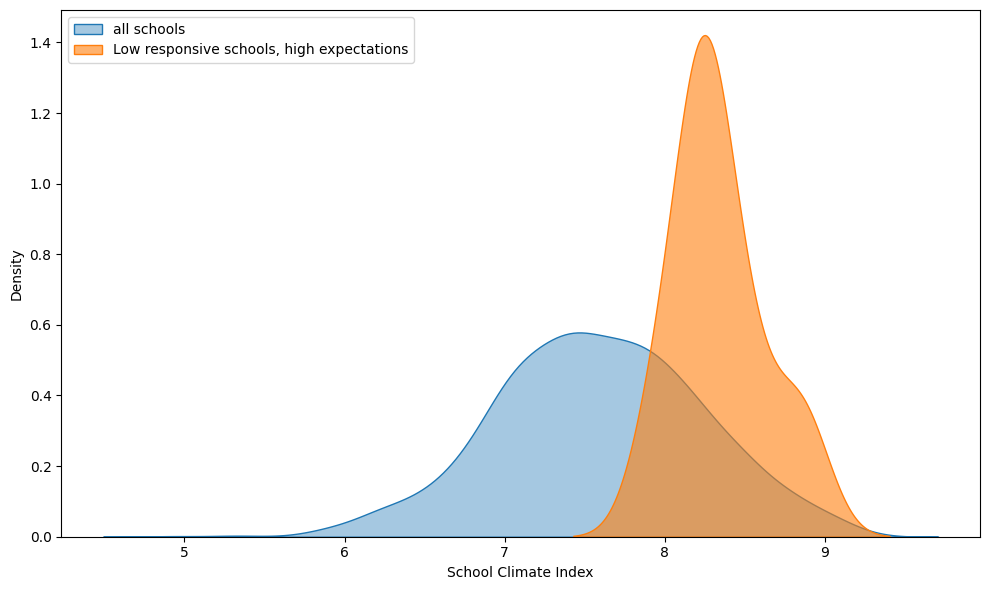

In [98]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='School Climate Index', label='all schools', fill=True, alpha=0.4)
sns.kdeplot(data=outliers_low_response_high_expect, x='School Climate Index', label='Low responsive schools, high expectations', fill=True, alpha=0.6)
plt.xlabel('School Climate Index')
plt.legend()
plt.tight_layout()
plt.show()
